In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, TimesNet

from neuralforecast.losses.numpy import mae, mse

import yfinance as yf

In [2]:
df = yf.Ticker("VTI").history(start="2016-01-01", period='1d')
df.reset_index(inplace=True)
# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get month of each sample
df['month'] = df.date.dt.month

df['ds'] = df['date'].dt.tz_localize(None)
df['unique_id'] = 'OT'
df['y'] = df['close']
df.drop(columns=['dividends', 'stock_splits', 'capital_gains', 'date'], inplace=True)

In [3]:
df.head()

,open,high,low,close,volume,month,ds,unique_id,y
0,89.258228,89.580173,88.388095,89.397446,6138300,1,2016-01-04,OT,89.397446
1,89.536663,89.780299,89.014585,89.597572,3652300,1,2016-01-05,OT,89.597572
2,88.344576,88.953673,87.839897,88.396782,3732800,1,2016-01-06,OT,88.396782
3,86.926273,87.709393,86.030037,86.230164,9256200,1,2016-01-07,OT,86.230164
4,86.673943,87.004591,85.081598,85.246925,7015800,1,2016-01-08,OT,85.246925


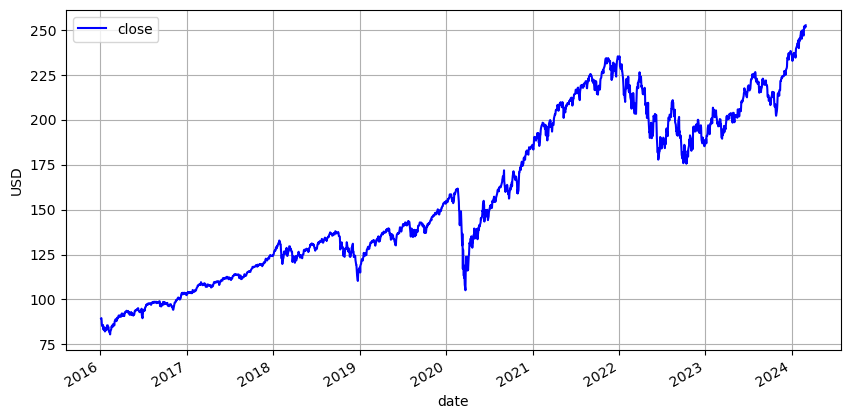

In [3]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 5 # width 10, height 8

ax = df.plot(x='ds', y='close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")
plt.show()

In [4]:
horizon = 96

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         TimesNet(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

# nf = NeuralForecast(models=models, freq='D')

Seed set to 1
Seed set to 1
Seed set to 1


Учится долго! Особенно `TimesNet`

In [5]:
# preds_df = nf.cross_validation(df=df, step_size=horizon, n_windows=2)

In [6]:
preds_df = pd.read_csv('preds_df.csv')


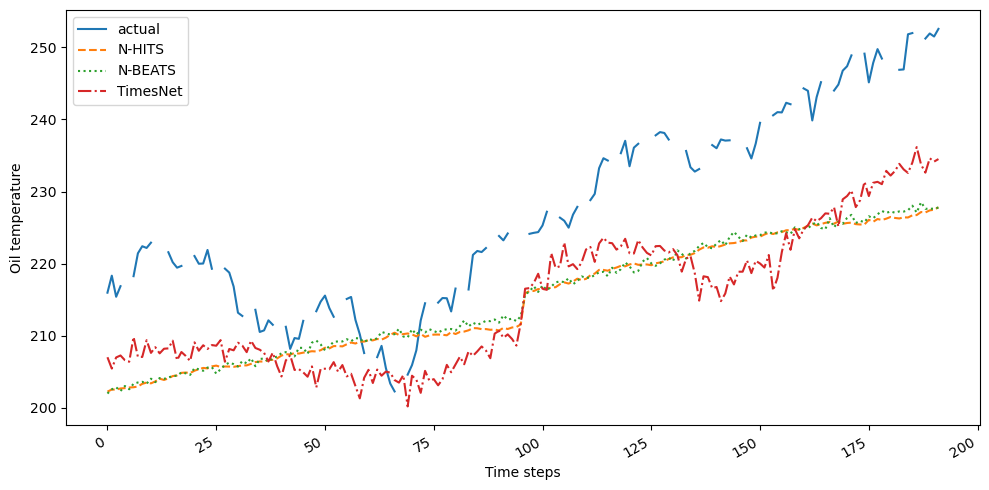

In [9]:
fig, ax = plt.subplots()

ax.plot(preds_df['y'], label='actual')
ax.plot(preds_df['NHITS'], label='N-HITS', ls='--')
ax.plot(preds_df['NBEATS'], label='N-BEATS', ls=':')
ax.plot(preds_df['TimesNet'], label='TimesNet', ls='-.')

ax.legend(loc='best')
ax.set_xlabel('Time steps')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()